# Decision Trees

https://pub.towardsai.net/decision-trees-in-machine-learning-ml-with-python-tutorial-3bfb457bce67

# What is Decision Trees?

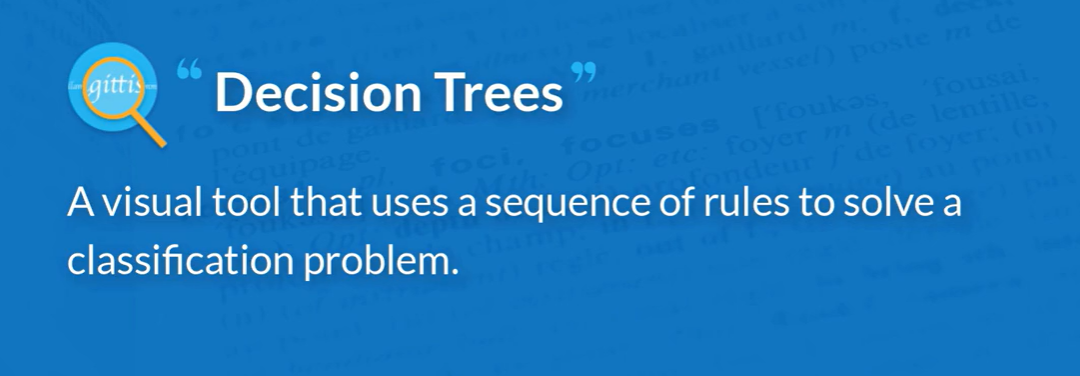

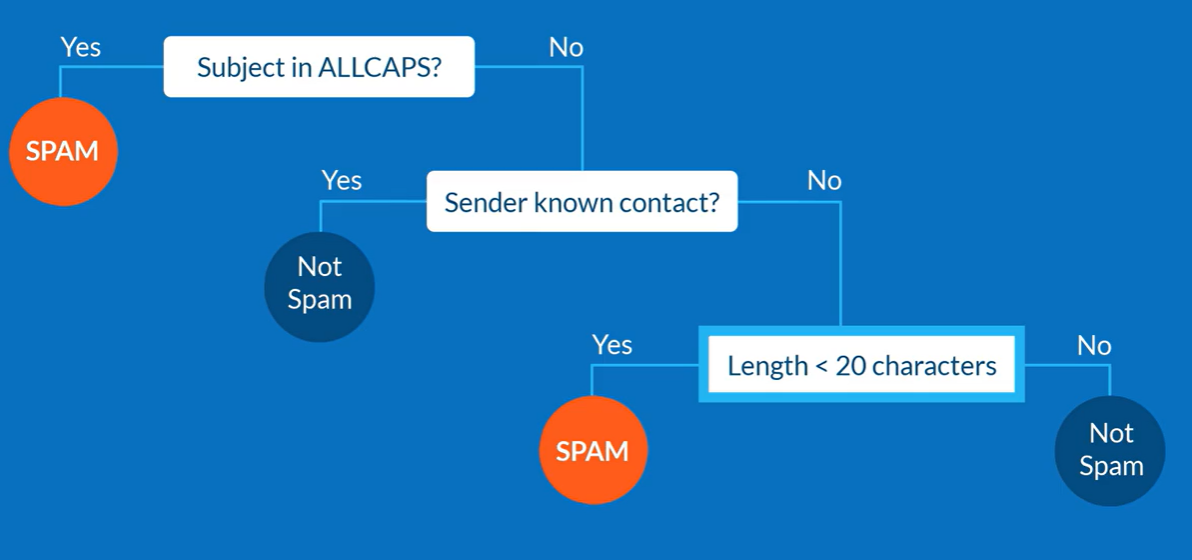

In [1]:
import pandas as pd
telecom_dataset = pd.read_csv('telecom_dataset.csv',index_col=0)
telecom_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,0
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,1
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75,0
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,1


In [2]:
telecom_dataset.shape

(7032, 20)

In [3]:
response = telecom_dataset[['Churn']]
response.head()

,Churn
customerID,
7590-VHVEG,0
5575-GNVDE,0
3668-QPYBK,1
7795-CFOCW,0
9237-HQITU,1


In [4]:
predictors = telecom_dataset.drop('Churn', axis=1)
predictors.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65


# Visualizing the Response Feature

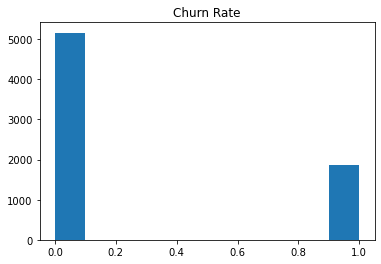

In [5]:
import matplotlib.pyplot as plt
plt.hist(response)
plt.title("Churn Rate");

# Visualizing the Predictor Features

In [6]:
predictors.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,34,56.95,1889.50
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65


In [7]:
list(predictors)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

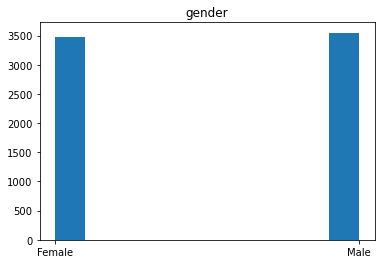

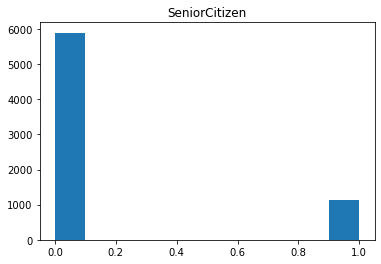

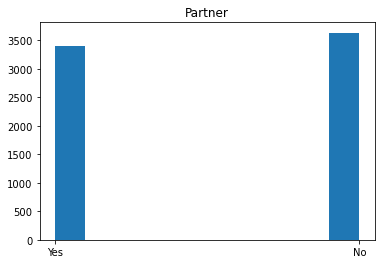

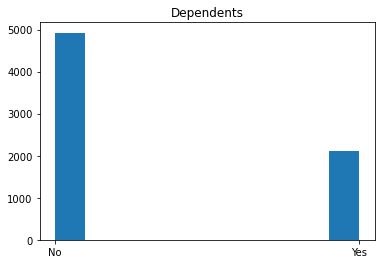

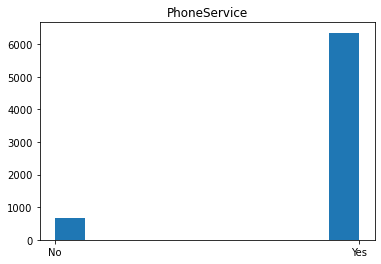

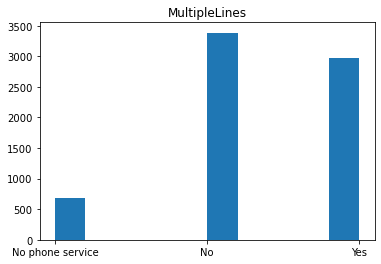

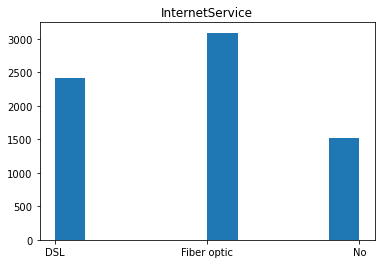

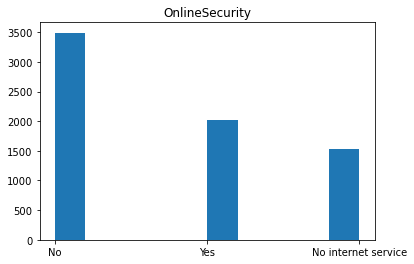

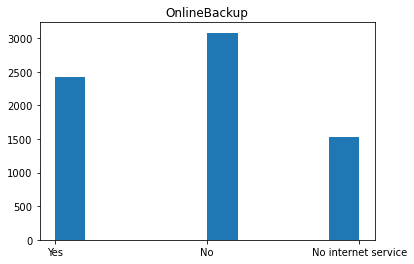

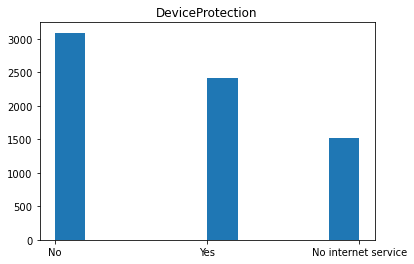

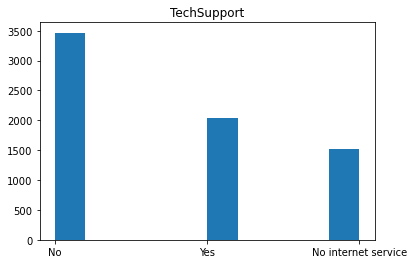

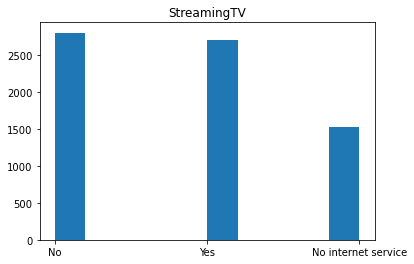

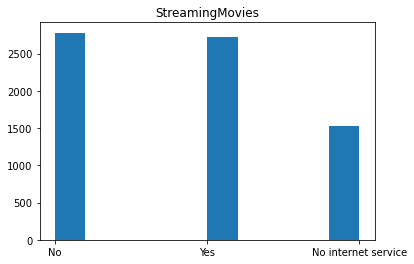

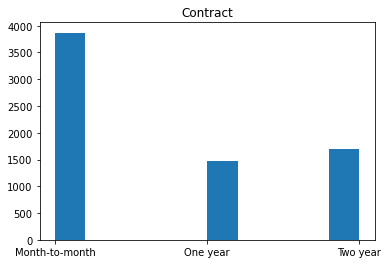

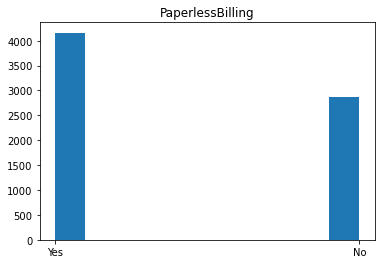

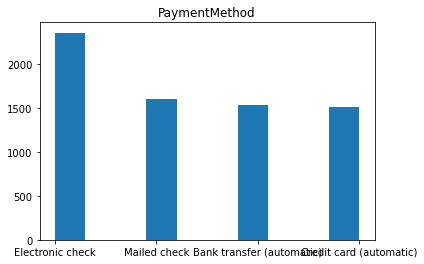

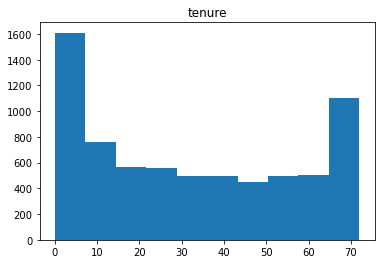

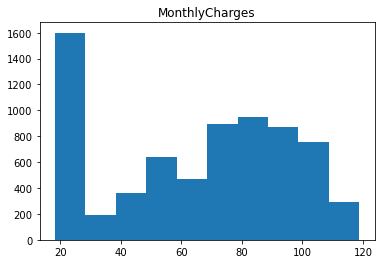

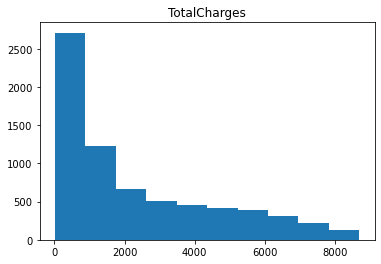

In [8]:
for predictor in list(predictors):
    plt.hist(predictors[predictor])
    plt.title(predictor)
    plt.show();

# Creating Dummy Variables 

In [9]:
categorical_features=list(predictors.iloc[:,:16])
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [10]:
predictors=pd.get_dummies(predictors,columns=categorical_features)
print(predictors.shape)
predictors.head()

(7032, 46)


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Splitting the Data

In [11]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

In [12]:
print(predictors.shape)
print(response.shape)
print()
print(predictors_train.shape)
print(predictors_test.shape)
print(response_train.shape)
print(response_test.shape)

(7032, 46)
(7032, 1)

(5625, 46)
(1407, 46)
(5625, 1)
(1407, 1)


In [13]:
predictors_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0516-VRYBW,65,20.15,390.85,0,1,0,1,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2959-EEXWB,31,50.90,2333.85,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3563-SVYLG,15,62.65,4375.80,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,1,0,0
5515-RUGKN,71,54.75,438.05,1,0,1,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
1310-QRITU,71,50.30,913.30,0,1,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [14]:
predictors_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
1750-CSKKM,62,55.35,449.75,0,1,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
1104-TNLZA,10,105.80,2998.00,0,1,1,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
8883-ANODQ,1,84.40,5746.75,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3507-GASNP,68,19.95,1189.90,1,0,1,0,0,1,1,...,0,0,0,1,0,1,1,0,0,0
1122-JWTJW,72,70.65,70.65,0,1,0,1,0,1,1,...,1,0,0,1,0,1,1,0,0,0


In [15]:
response_train.head()

,Churn
customerID,
0516-VRYBW,1
2959-EEXWB,0
3563-SVYLG,0
5515-RUGKN,0
1310-QRITU,0


In [16]:
response_test.head()

,Churn
customerID,
1750-CSKKM,1
1104-TNLZA,0
8883-ANODQ,0
3507-GASNP,0
1122-JWTJW,1


# Training the Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(predictors_train, response_train)

DecisionTreeClassifier()

In [18]:
response_predictions = classifier.predict(predictors_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("  TN  FN")
print(confusion_matrix(response_test, response_predictions))
print("  TP  FP")
print()

# TN = True Negatives = Number of people who the model predicted would not churn and who actually did not churn
# FN = False Negatives = Number of people who the model predicted would not churn and who actually did churn
# TP = True Positives = Number of people who the model predicted would churn and who actually did churn
# FP = False Positives = Number of people who the model predicted would churn and who actually did not churn
# Confusion matrix = 2x2 matrix which shows how many predictions were correct and how many were incorrect

  TN  FN
[[830 212]
 [180 185]]
  TP  FP



- The first value in the first row represents the number of true negatives. This means the number of people who the model predicted would not churn and who actually did not churn.

- The next value to the right is the number of false negatives. This is the number of people who the model predicted would not churn, but who actually did churn.

- The first value in the second row is the number of true positives. This means a number of people who the model predicted would churn who actually did churn.

- And the last value is the false positives. This is the number of people who the model predicted would churn, but who actually did not churn.

# Evaluating Precision

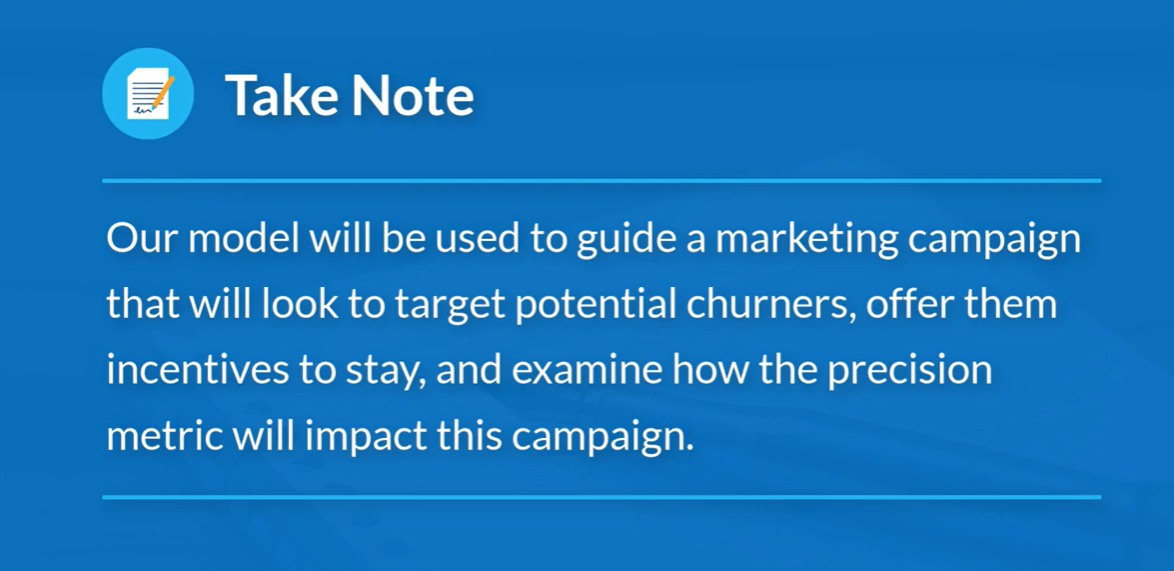

- Precision is a metric which lets us know what proportion of the model's predictions are correct.

In [20]:
print(classification_report(response_test, response_predictions,target_names=["Stayed","Churned"]))

              precision    recall  f1-score   support

      Stayed       0.82      0.80      0.81      1042
     Churned       0.47      0.51      0.49       365

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



------
- If we look at the accuracy value, we can see that it's 72%. This is calculated by summing true positives and true negatives and dividing by the total number of rows in the data set.
- That might seem good, but this value isn't very useful because it's very prone to bias. If we briefly scroll up to our visualization of the response feature, we can see that around 75% of our data was for people who didn't churn. If we had a model that predicted that 100% of people would not churn, that would have an accuracy of 75% because 75% of people actually didn't churn.
- Our model isn't nearly that bad, but this is something to keep in mind when looking at the accuracy measure.
------
- Exploring the precision of our model. Of the people who are predicted to have stayed, precision represents the proportion who actually did stay.
- This is calculated by taking the number of true negatives and dividing it by the total number of predicted negatives, which is the sum of true negatives and false negatives. This value can also be found under support.
- For stayed, precision is 0.82, which means that 82% of predictions that said the person wouldn't churn were correct. This is high, but it is generally easier for the model to predict when people didn't churn, since there are more of those people.
- As we just saw 1042 customers were predicted to not have churned. This makes up about 75% of all customers in our data set. If we use this model on a new group of customers, we can remove the 75% of people who are predicted staying from the marketing campaign. This would drastically reduce the cost of the campaign and we can be fairly certain that of all the people we're not targeting only 18% will actually be at risk of turning.
------
- For the churn row, precision represents more or less the same thing. Of people who were predicted to have churned, precision represents the proportion who actually did churn. This is calculated by taking the number of true positives and dividing it by the total number of predicted positives, which is the sum of true positives and false positives. This value can also be found under support. Note that the precision here is quite low at 0.47.
- What this means for our marketing campaign is that only 47% of people we're targeting were actually ever at risk of churning. In other words, 53% of all the incentives we'll be offering will be to people who are never going to churn. That can be considered wasteful expenditure.
- Also, you might be thinking that 47% is worse than using a coin toss to determine the status of each customer. But keep in mind that a coin toss would lower precision for people who stayed from 82% to 50%. So while we could identify slightly more churners by using a coin toss that would come at the cost of falsely identifying half of all people who stayed as having churned.
------

# Evaluating Recall

- Recall is a metric which represents how good the model is at actually finding people who stayed or churned.

In [21]:
print(classification_report(response_test, response_predictions,target_names=["Stayed","Churned"]))

              precision    recall  f1-score   support

      Stayed       0.82      0.80      0.81      1042
     Churned       0.47      0.51      0.49       365

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



-------
- For the stayed row, recall represents how good the model is at finding people who did not churn. It's calculated by dividing true negatives by actual negatives. Actual negatives are calculated by summing true negatives and false positives.
- For stayed, this value is 0.79. That means that 21% of all people who did not churn were incorrectly predicted to have churned. If we're using this model to help target potential customers for a customer retention campaign, this metric gives us an idea of potential waste that could arise.
- It effectively tells us that among all of our loyal customers, we'll be offering 21% of them incentives to stay, even when they weren't at risk of churning.
-------
- For the churn row, recall represents how good the model is at finding people who actually did churn. It's calculated by dividing true positives by actual positives. Actual positives are calculated by summing true positives and false negatives.
- For churned, this is 0.51, meaning that only 51% of people who actually churned were identified as such by the model. As a result, 49% were predicted as staying.
- What this means for our marketing campaign is that 49% of all churners will not be offered incentives to entice them into keeping their subscription.
-------
- As a side note, it's useful to know that there's an interplay between recall and precision.
- We could boost our recall by telling the model to aggressively label people as churners in order to catch all the real churners, but that will dramatically lower precision as it will misattribute far more people who stayed as churners.
------

### Conclusion
- What precision and recall tell us here is that the model isn't nearly as accurate when it comes to predicting who churned. 53% of people who classified as churners actually never churned, and 49% of people who actually churned are classified as having stayed.

- But because we have far more data for people who stayed and because the model is more accurate for these people, the model's overall accuracy is 0.72.

# Visualizing the Decision Tree

In [22]:
import graphviz
from sklearn.tree import export_graphviz

graphic_export = export_graphviz(
    classifier,
    feature_names = list(predictors),
    class_names=['Stay','Churn'],  
    rounded=True,
    filled=True,
)

decision_tree_graphic = graphviz.Source(graphic_export) 
decision_tree_graphic

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Pruning the Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(predictors_train, response_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

response_predictions = classifier.predict(predictors_test)
print("  TN  FN")
print(confusion_matrix(response_test, response_predictions))
print("  TP  FP")
print()
print(classification_report(response_test, response_predictions,target_names=["Stayed","Churned"]))

  TN  FN
[[1017   25]
 [ 287   78]]
  TP  FP

              precision    recall  f1-score   support

      Stayed       0.78      0.98      0.87      1042
     Churned       0.76      0.21      0.33       365

    accuracy                           0.78      1407
   macro avg       0.77      0.59      0.60      1407
weighted avg       0.77      0.78      0.73      1407



In [30]:
import graphviz
from sklearn.tree import export_graphviz

graphic_export = export_graphviz(
    classifier,
    feature_names = list(predictors),
    class_names=['Stay','Churn'],  
    rounded=True,
    filled=True,
)

decision_tree_graphic = graphviz.Source(graphic_export) 
decision_tree_graphic

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [31]:
classifier2 = DecisionTreeClassifier(max_depth=3)
classifier2.fit(predictors_train, response_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
response_predictions = classifier2.predict(predictors_test)
print("  TN  FN")
print(confusion_matrix(response_test, response_predictions))
print("  TP  FP")
print()
print(classification_report(response_test, response_predictions,target_names=["Stayed","Churned"]))

  TN  FN
[[1017   25]
 [ 287   78]]
  TP  FP

              precision    recall  f1-score   support

      Stayed       0.78      0.98      0.87      1042
     Churned       0.76      0.21      0.33       365

    accuracy                           0.78      1407
   macro avg       0.77      0.59      0.60      1407
weighted avg       0.77      0.78      0.73      1407



In [33]:
import graphviz
from sklearn.tree import export_graphviz

graphic_export = export_graphviz(
    classifier2,
    feature_names = list(predictors),
    class_names=['Stay','Churn'],  
    rounded=True,
    filled=True,
)

decision_tree_graphic = graphviz.Source(graphic_export) 
decision_tree_graphic

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH